Dimensionality reduction: 
- More efficient storage and computation
- Remove less-informative "noise" features, which can cause problems for prediction tasks (classification, regression).

# Principal Component Analysis (PCA)

1. Finds center of the data (avg measures for each variable).
2. Shifts the data so that center is on top of origin.
3. Finds line of best fit for all points (least squares of points and line of best or least squares of projection of points to line of best fit and origin).
4. PC2 is the line perpendicular to PC1 that passes through origin (for more dimensions, continue finding line of best fit)
4. Find eigenvector, eigenvalue (SSD of PC1), and singular value (variation, sqrt of eigenvalue). Variation shows the importance of each new feature. 
6. Rotate everything so that PC1 is horizontal. PCs are decorrelated (pearsonr=0)

## Grains Dataset

In [36]:
import pandas as pd
import numpy as np

In [37]:
grains = pd.read_csv("datasets/grains/seeds-width-vs-length.csv", names=["width", "length"])

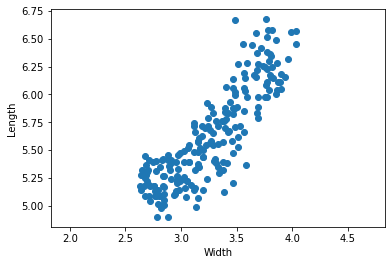

Correlation: 0.8604149377143469
p-value: 8.121332906192771e-63


In [13]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

width = grains.width
length = grains.length

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(f"Correlation: {correlation}\np-value: {pvalue}")


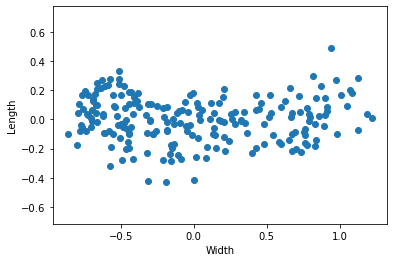

Correlation: -4.163336342344337e-17
p-value: 0.999999999999971


In [53]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys

plt.scatter(xs, ys)
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(f"Correlation: {correlation}\np-value: {pvalue}")

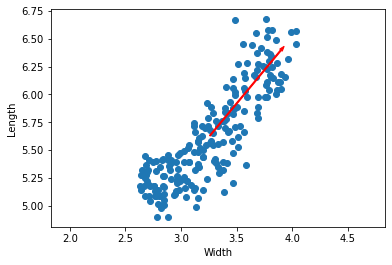

In [56]:
# Make a scatter plot of the untransformed points
plt.scatter(width, length)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.xlabel("Width")
plt.ylabel("Length")
plt.show()

Because PCA rotates the data along the PC1, and PC2 is perpendicular to PC1, PC1 and PC2 should have a Pearson correlation of 0!

### Intrinsic Dimension

Intrinsic Dimension: number of features needed to approximate a dataset 

In [57]:
print(f"Components:\n{model.components_}")
print(f"\nExplained variance:\n{model.explained_variance_}")
print(f"\nExplained variance ratio:\n{model.explained_variance_ratio_}")

Components:
[[ 0.63910027  0.76912343]
 [-0.76912343  0.63910027]]

Explained variance:
[0.31595462 0.02301882]

Explained variance ratio:
[0.93209254 0.06790746]


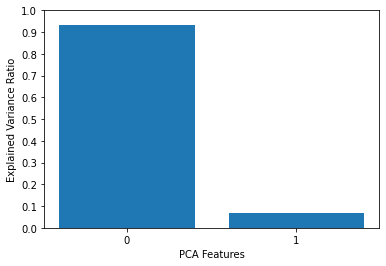

In [51]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xticks(features)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("PCA Features")
plt.ylabel("Explained Variance Ratio")
plt.show()

PCA 1 explains 93% of the variance of the features. 